# IA318 - Reinforcement Learning

# Markov Decision Process

This notebook presents some examples of Markov Decison Processes, where an **agent** interacts with its **environment** and collects **rewards**.

In [1]:
import numpy as np
from copy import deepcopy

## Walk on a line

We start with a walk on a line, hiding some rewards.

In [2]:
from model import Walk, Agent

In [3]:
# environment
walk = Walk()

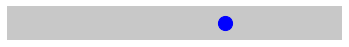

In [6]:
walk.display()

In [7]:
walk.state

6

In [8]:
# agent with random policy
agent = Agent(walk)

In [9]:
agent.get_action(walk.state)

1

In [10]:
action = agent.get_action(walk.state)

In [11]:
reward, stop = walk.step(action)

In [12]:
reward

0

In [13]:
walk.state

5

In [14]:
def simulate(environment, agent, n_steps=50):
    states = []
    rewards = []
    for t in range(n_steps):
        states.append(environment.state)
        action = agent.get_action(environment.state)
        reward, stop = environment.step(action)
        rewards.append(reward)
        if stop:
            break
    return states, rewards

In [15]:
states, rewards = simulate(walk, agent)

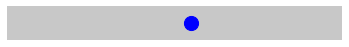

In [16]:
animation = walk.display(states)

In [17]:
animation

In [18]:
rewards[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Maze

Now we'll try to escape a maze.

In [19]:
maze_map = np.load('maze.npy')

In [20]:
from model import Maze, Agent

In [21]:
maze = Maze()
init_state = (1, 0)
exit_state = (1, 20)
maze.set_parameters(maze_map, init_state, [exit_state])
maze = Maze()

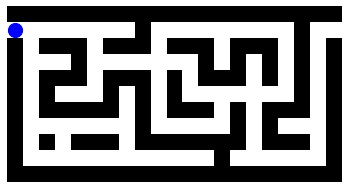

In [22]:
maze.display()

In [23]:
maze.state

array([1, 0])

In [24]:
maze.get_reward(init_state)

0

In [25]:
maze.get_reward(exit_state)

1

In [26]:
# agent with random policy
agent = Agent(maze)

In [27]:
agent.get_action(maze.state)

(0, 1)

In [28]:
states, rewards = simulate(maze, agent, n_steps=100)

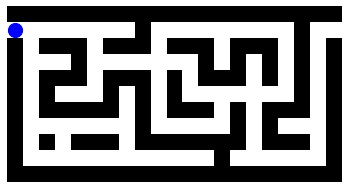

In [29]:
animation = maze.display(states)

In [30]:
animation

In [31]:
np.max(rewards)

0

## Games

Finally, let's play games!<br>
Note that in most games:
* you play against an adversary (which is part of the environment),
* you may play first or second,
* when your adversary plays, you have only one possible action (pass).

We here consider [Tic-Tac-Toe](https://en.wikipedia.org/wiki/Tic-tac-toe), [Nim](https://en.wikipedia.org/wiki/Nim) and [Connect Four](https://en.wikipedia.org/wiki/Connect_Four).
Feel free to add more :-)

In [32]:
from model import TicTacToe, Nim, ConnectFour, Agent

### Tic-Tac-Toe

In [35]:
game = TicTacToe()

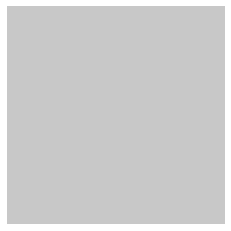

In [36]:
game.display()

In [37]:
# player, board
game.state

[1, array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])]

In [38]:
agent = Agent(game)

In [39]:
def play(environment, agent):
    states = []
    rewards = []
    stop = False
    while not stop:
        state = deepcopy(environment.state)
        states.append(state)
        action = agent.get_action(state)
        reward, stop = environment.step(action)
        rewards.append(reward)
    states.append(deepcopy(environment.state))
    return states, rewards

In [40]:
states, rewards = play(game, agent)

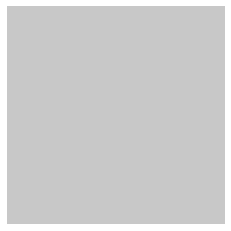

In [41]:
animation = game.display(states)

In [42]:
animation

In [43]:
rewards[-1]

1

In [44]:
# your adversary starts
game = TicTacToe(play_first=False)

In [45]:
agent = Agent(game)

In [46]:
states, rewards = play(game, agent)

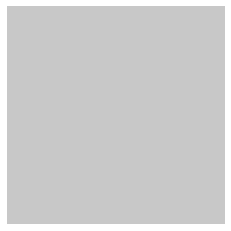

In [47]:
animation = game.display(states)

In [48]:
# now red starts
animation

In [49]:
# a better policy
def one_step_policy(state):
    game = TicTacToe()
    player, board = state
    actions = game.get_actions(state)
    # attack
    for action in actions:
        probs, states, rewards = game.get_model(state, action)
        if player in rewards:
            return [1], [action]
    # defence
    for action in actions:
        state = -player, board
        probs, states, rewards = game.get_model(state, action)
        if -player in rewards:
            return [1], [action]
    # random
    i = np.random.choice(len(actions))
    action = actions[i]
    return [1], [action]

In [50]:
game = TicTacToe()

In [51]:
agent = Agent(game, one_step_policy)

In [52]:
states, rewards = play(game, agent)

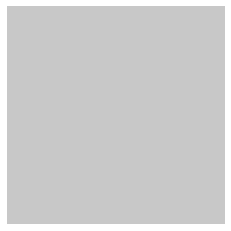

In [53]:
animation = game.display(states)

In [54]:
animation

In [55]:
# your adversary is not stupid now
game = TicTacToe(adversary_policy=one_step_policy)

In [56]:
agent = Agent(game, one_step_policy)

In [57]:
states, rewards = play(game, agent)

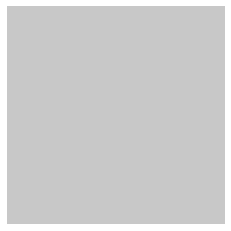

In [58]:
animation = game.display(states)

In [59]:
animation

## To do

Organize a competition and give the rate of wins and ties over 100 matches, when you start.

### Nim

In [67]:
game = Nim()

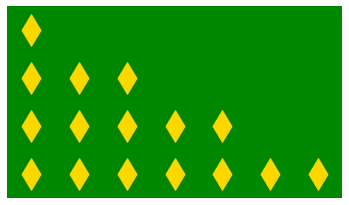

In [68]:
game.display()

In [69]:
# player, board
game.state

[1, array([1, 3, 5, 7])]

In [70]:
agent = Agent(game)

In [71]:
states, rewards = play(game, agent)

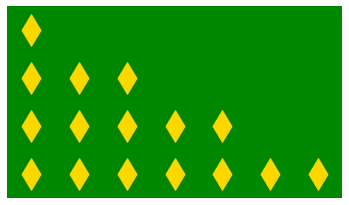

In [72]:
animation = game.display(states)

In [73]:
animation

## To do 

Play and try to win!

In [74]:
game = Nim()

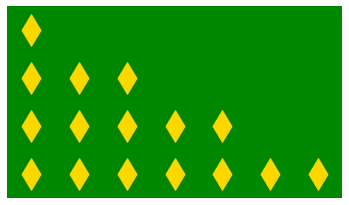

In [75]:
game.display()

In [76]:
# your turn
action = (1, 3)
game.step((1, 3))

(0, False)

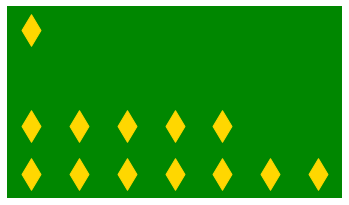

In [77]:
game.display()

In [78]:
# adversary
game.step()

(0, False)

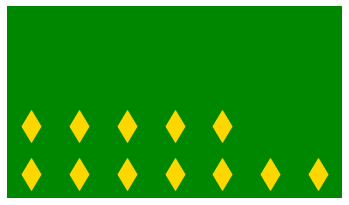

In [79]:
game.display()

### Connect Four

In [80]:
game = ConnectFour()

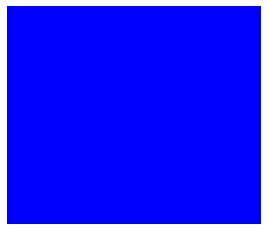

In [81]:
game.display()

In [82]:
game.state

[1, array([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])]

In [83]:
agent = Agent(game)

In [84]:
states, rewards = play(game, agent)

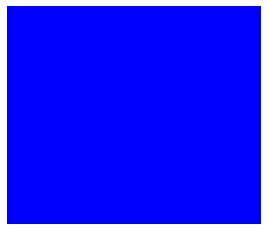

In [85]:
animation = game.display(states)

In [86]:
animation

## To do

Test the one-step-policy. What is your win rate if your adversary plays at random?

In [89]:
def one_step_policy(state):
    game = ConnectFour()
    player, board = state
    actions = game.get_actions(state)
    # attack
    for action in actions:
        probs, states, rewards = game.get_model(state, action)
        if player in rewards:
            return [1], [action]
    # defence
    for action in actions:
        state = -player, board
        probs, states, rewards = game.get_model(state, action)
        if -player in rewards:
            return [1], [action]
    # random
    i = np.random.choice(len(actions))
    action = actions[i]
    return [1], [action]

In [90]:
game = ConnectFour()

In [91]:
agent = Agent(game, one_step_policy)

In [92]:
states, rewards = play(game, agent)

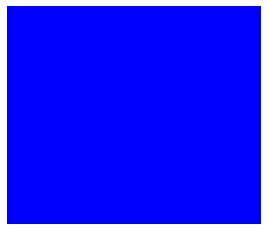

In [93]:
animation = game.display(states)

In [94]:
animation